In [7]:
from transformers import GPT2LMHeadModel

In [8]:
# Load the 124M GPT-2 version.
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')
model_state = model_hf.state_dict()
for k, v in model_state.items():
    print(k, v.shape)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [9]:
model_state['transformer.wpe.weight'].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

Matplotlib is building the font cache; this may take a moment.


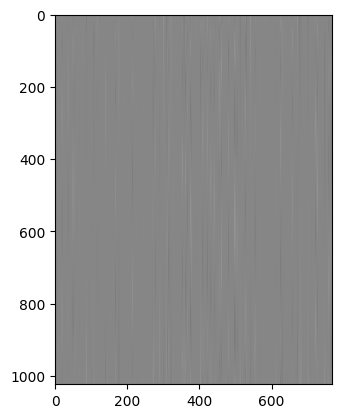

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(model_state['transformer.wpe.weight'], cmap='gray')

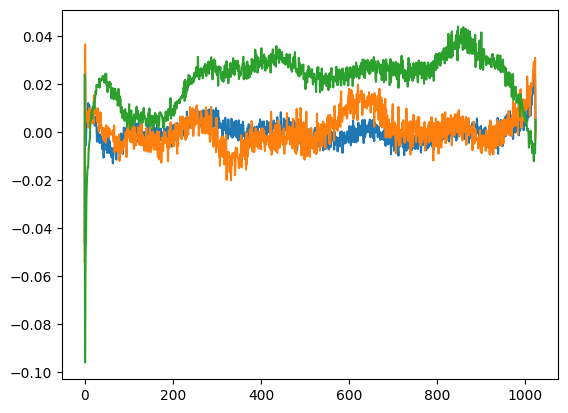

In [11]:
plt.plot(model_state['transformer.wpe.weight'][:, 150])
plt.plot(model_state['transformer.wpe.weight'][:, 200])
plt.plot(model_state['transformer.wpe.weight'][:, 250])

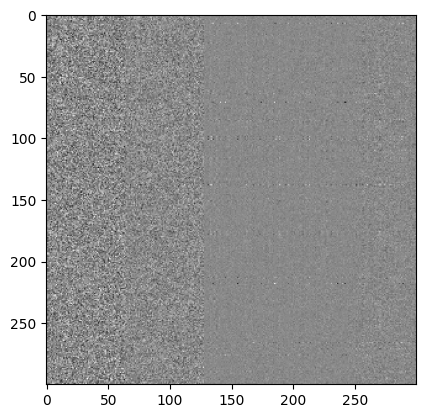

In [14]:
plt.imshow(model_state['transformer.h.1.attn.c_attn.weight'][:300, :300], cmap='gray')

In [16]:
from transformers import pipeline, set_seed

generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator('hello, i\'m a language model', max_length=30, num_return_sequences=5)

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "hello, i'm a language modeler\n\nSo, what did I learn?\n\nWell, I didn't learn the idea of a language model.\n\nI learned how to write a lot of simple code.\n\nI learned how to call functions.\n\nI learned how to implement a lot of different things.\n\nWhat do you think?"},
 {'generated_text': 'hello, i\'m a language model.\n\nHere\'s a look at an example:\n\ndef test ( name, body ) : """\n\nA single character should be considered an identifier.\n\nA single character should be considered an identifier.\n\n""" # Here it says that all the characters are a single character. # This is done to ensure that the identifier is a single number.\n\n# This is done to ensure that the identifier is a single number.\n\ndef main ( args ) : """\n\nWe will use the above to pass in a single string in the test.\n\nThe test will be run using the above.\n\nThe test will be run using the above.\n\nThe test will be run using the above.\n\n""" # Here it says that all the characters are a s